### MNIST Introduction

MNIST는 (Handwritten digits dataset) 손으로 쓴 아라비아 숫자 이미지를 의미한다. <br><br>
각 image file은
* 28 x 28 
* 1 channel gray image
* 0 ~ 9 digits<br>
의 특징을 가진다<br><br>
** torchvision은 유명한 다양한 dataset을 제공하는 package이다.

### Epoch / Batch size / Iteration<br><br>

epoch = one forward pass and one backward pass of all the training examples<br><br>

batch size = the number of training examples in one forward/backward pass. The higher the batch size. the more memory space you'll need<br><br>

number of iterations = number of passes, each pass using [batch size] number of examples. To be clear, one pass = one forward pass + one backward pass(we do not count the forward pass and backward pass as two different psses.<br><br>

Example : If you have 1000 traning examples, and your batch size is 500. then it will take 2 iterations to complete 1 epoch.

In [8]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [9]:
# cuda(gpu 사용) 만약 없다면 CPU로...
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [10]:
# parameters
training_epochs = 15
batch_size = 100

In [11]:
# MNIST dataset
# torchvision의 MNIST는 4개의 인자를 받는다.
# root(위치) train(T->trainset y->testset 호출) transform(적용할 transform 선택), download()
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [12]:
# dataset loader
# data_loader 함수를 사용하여 data를 불러온다.
# DataLoader(무슨 data인가) batch_size(잘라오는 크기),
# suffle(불러올 떄 무작위로 불러올 것인가.), drop_last(잘라온 뒤 남는 data는 어떻게 할 것인가.)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [13]:
# MNIST data image of shape 28 * 28 = 784
# Softmax를 사용하기 위해 torch.nn.Linear 사용
# MNIST가 28x28이기떄문에 입력은 784, 10은 MNIST의 Label(0~9)
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [14]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed. (in pytorch)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [15]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180703
Epoch: 0007 cost = 0.295130253
Epoch: 0008 cost = 0.290851563
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800683
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learning finished


Accuracy: 0.8863000273704529
Label:  5
Prediction:  8


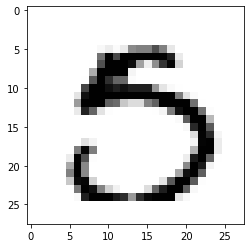

In [24]:
# Visualization
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()